# KNN


In [1]:
import os.path

import pandas as pd
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset
from assignment_2.digits_classifiers.classifiers import NaiveBayes
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-23 12:59:00.920 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Train Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [5]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

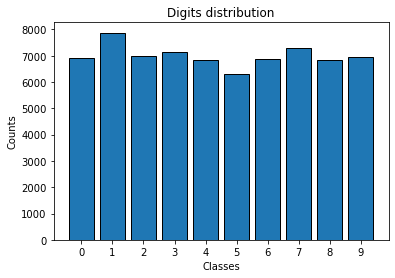

In [7]:
data.digit_distribution()

## Plotting the mean distribution

2022-12-23 12:58:48.310 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\0_mean
2022-12-23 12:58:48.529 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\1_mean
2022-12-23 12:58:48.763 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\2_mean
2022-12-23 12:58:48.998 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\3_mean
2022-12-23 12:58:49.248 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\4_mean
2022-12-23 12:58:49.498 | INFO     | assignment_2.

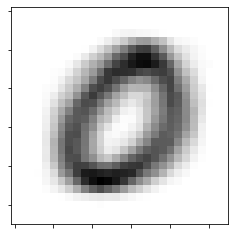

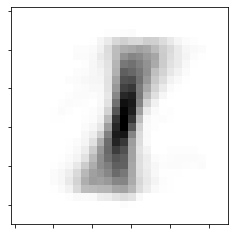

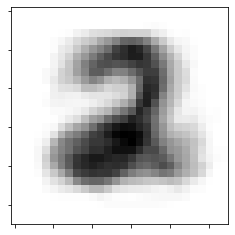

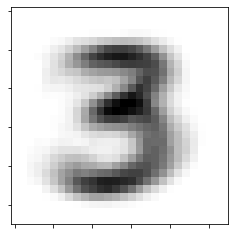

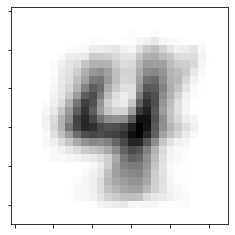

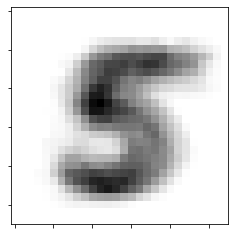

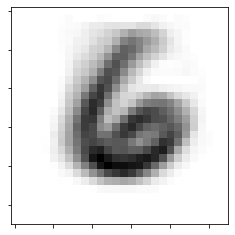

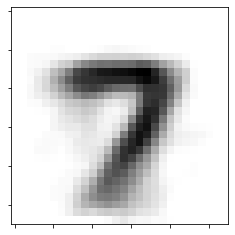

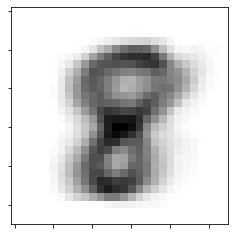

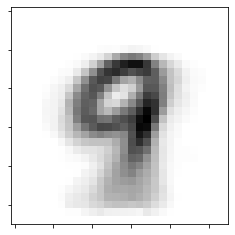

In [8]:
import numpy as np

from assignment_2.digits_classifiers.utils import chunks, plot_digit

def mean_distribution():
    for i in range(10):
        pixels = [(np.array(X.loc[y==i]))[:, c].mean() for c in range(len(X.columns))]
        chunks_ = chunks(lst=pixels, n=28)
        plot_digit(pixels=chunks_, save=True, file_name=f"{i}_mean")

mean_distribution()

## Modelling bayes

In [8]:
nb = NaiveBayes(train=train, test=test)

In [9]:
%%time
nb.train()

C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\classifiers.py:308: RuntimeWarning: invalid value encountered in double_scalars
  k = mean * (1-mean) / var - 1  # K = ( E[X] * (1 - E[X]) / Var[X] ) - 1


Wall time: 859 ms


In [10]:
%%time
nb.predict()

 > 0.000000
 > 0.428571
 > 0.857143
 > 1.285714
 > 1.714286
 > 2.142857
 > 2.571429
 > 3.000000
 > 3.428571
 > 3.857143
 > 4.285714
 > 4.714286
 > 5.142857
 > 5.571429
 > 6.000000
 > 6.428571
 > 6.857143
 > 7.285714
 > 7.714286
 > 8.142857
 > 8.571429
 > 9.000000
 > 9.428571
 > 9.857143
 > 10.285714
 > 10.714286
 > 11.142857
 > 11.571429
 > 12.000000
 > 12.428571
 > 12.857143
 > 13.285714
 > 13.714286
 > 14.142857
 > 14.571429
 > 15.000000
 > 15.428571
 > 15.857143
 > 16.285714
 > 16.714286
 > 17.142857
 > 17.571429
 > 18.000000
 > 18.428571
 > 18.857143
 > 19.285714
 > 19.714286
 > 20.142857
 > 20.571429
 > 21.000000
 > 21.428571
 > 21.857143
 > 22.285714
 > 22.714286
 > 23.142857
 > 23.571429
 > 24.000000
 > 24.428571
 > 24.857143
 > 25.285714
 > 25.714286
 > 26.142857
 > 26.571429
 > 27.000000
 > 27.428571
 > 27.857143
 > 28.285714
 > 28.714286
 > 29.142857
 > 29.571429
 > 30.000000
 > 30.428571
 > 30.857143
 > 31.285714
 > 31.714286
 > 32.142857
 > 32.571429
 > 33.000000
 > 33.4285

In [11]:
nb.accuracy

0.8425714285714285

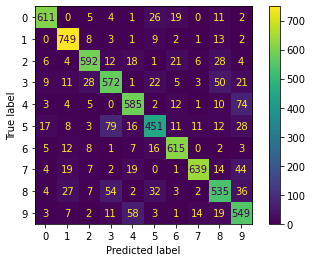

In [12]:
nb.confusion_matrix()

## Fool data

In [16]:
import numpy as np

from assignment_2.digits_classifiers.io import read_fool_dataset
from assignment_2.digits_classifiers.utils import chunks, plot_digit

def get_one_class_dataset() -> pd.DataFrame:
    return pd.concat(
        [ X.loc[y==i].head(1) for i in range(len(set(y))) ]
    )

def get_with_fool_dataset() -> pd.DataFrame:
    with_fool = pd.concat([
        get_one_class_dataset(),
        read_fool_dataset()
    ])
    return with_fool.reset_index(drop=True)

with_fools = np.array(get_with_fool_dataset())

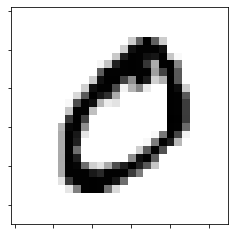

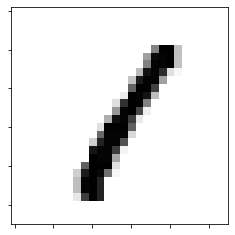

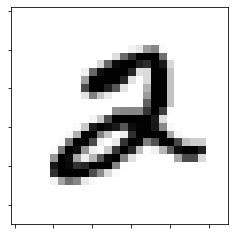

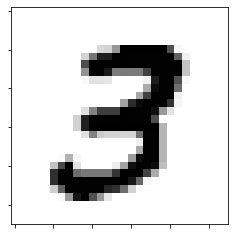

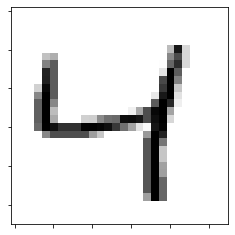

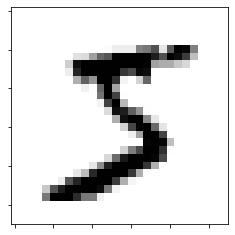

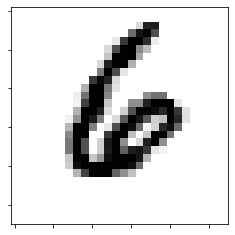

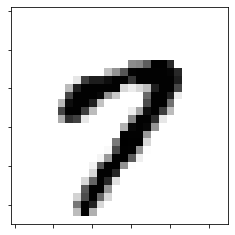

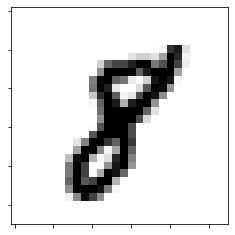

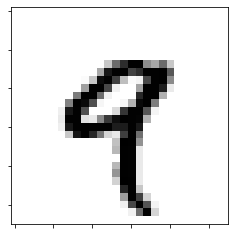

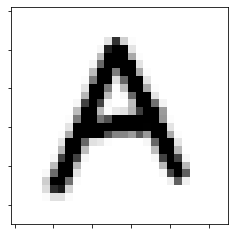

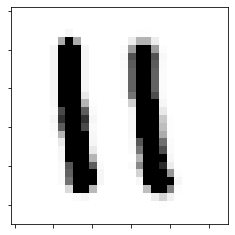

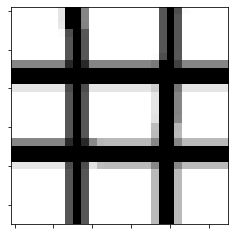

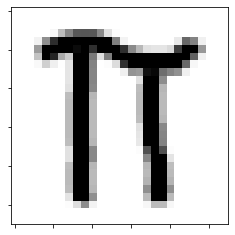

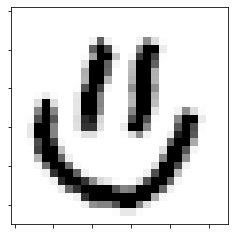

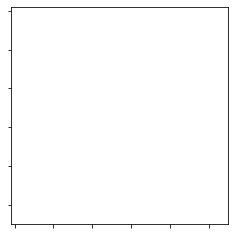

In [17]:
def plot_with_fools():
    for i in range(with_fools.shape[0]):
        chunks_ = chunks(lst=with_fools[i], n=28)
        plot_digit(pixels=chunks_)

plot_with_fools()

In [18]:
def get_products():

    labels = [i for i in range(10)]

    # probability products associated to each label
    products = [{ label: prod for prod, label in nb.estimator._labels_products(with_fools[i])} for i in range(len(with_fools))]

    # product converted to dictionary
    as_dict = {
        l : [product[l] for product in products]
        for l in labels
    }

    # convert to dataframe
    df = pd.DataFrame(as_dict)

    # set index
    df.set_index([[str(i) for i in range(10)] + ['A', 'eleven', 'grid', 'pi', 'smile', 'empty']], inplace=True)

    return df

In [19]:
df = get_products()
df

,0,1,2,3,4,5,6,7,8,9
0,3.858999e-203,0.000000e+00,4.673926e-279,3.717677e-277,8.314823e-301,4.075618e-250,1.271801e-285,0.000000e+00,6.238310e-278,1.357435e-310
1,7.426411e-242,9.415228e-123,1.851334e-170,4.119776e-183,6.820140e-187,2.591671e-175,1.239670e-206,2.841434e-197,9.462430e-163,6.707325e-196
2,1.892868e-287,0.000000e+00,4.788384e-239,1.817521e-284,9.169653e-283,1.655119e-267,3.297527e-274,6.710045e-307,1.540623e-259,4.166261e-284
3,6.075192e-277,0.000000e+00,2.481418e-255,2.432600e-223,1.014609e-281,3.352546e-242,5.277452e-308,4.559966e-307,2.545457e-228,6.083140e-276
4,0.000000e+00,0.000000e+00,6.398984e-294,3.033431e-296,2.716937e-247,1.132510e-290,1.236969e-316,9.766745e-286,7.372848e-316,2.791414e-283
5,3.289649e-271,8.595846e-304,5.243764e-259,2.396248e-227,4.849385e-274,1.726876e-224,1.047777e-253,0.000000e+00,1.467233e-240,2.851834e-278
6,0.000000e+00,0.000000e+00,2.395727e-254,6.375530e-281,1.109364e-271,5.492085e-269,1.921128e-210,0.000000e+00,1.369524e-267,0.000000e+00
7,8.819524e-255,1.944911e-308,2.478106e-255,1.913897e-261,4.211003e-214,1.722821e-228,9.896204e-244,1.713146e-176,1.497494e-234,1.077413e-195
8,1.278680e-284,1.700593e-234,1.000788e-239,4.029720e-245,1.575984e-252,1.494182e-226,2.120664e-265,8.084431e-259,8.213185e-204,1.132141e-244
9,7.667194e-266,4.156922e-271,4.529372e-240,6.059566e-249,6.767893e-191,2.436700e-220,8.112700e-226,1.188104e-197,1.808899e-222,5.634894e-170


In [20]:
from assignment_2.digits_classifiers.settings import get_root_dir, DATASETS

out = os.path.join(get_root_dir(), DATASETS, "bayes_fools.csv")
df.to_csv(out)